# WELCOME TO THE NOTEBOOK
---

Importing Modules

In [31]:
import pandas as pd 

Loading the data

In [32]:
data= pd.read_json('movies_dataset.json')
data.head()

,color,director_name,num_critic_for_reviews,duration,gross,genres,star_name,movie_title,movie_imdb_link,language,country,budget,title_year,imdb_score
0,Color,James Cameron,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,300000000.0,2007.0,7.1
2,Color,Sam Mendes,602.0,148.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,245000000.0,2015.0,6.8
3,Color,Christopher Nolan,813.0,164.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,250000000.0,2012.0,8.5
4,NaN,Doug Walker,NaN,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,7.1


Check the dataframe shape (#rows and #columns)

In [33]:
data.shape

(5043, 14)

Let's check the data types of the columns

In [34]:
data.dtypes

color                      object
director_name              object
num_critic_for_reviews    float64
duration                  float64
gross                     float64
genres                     object
star_name                  object
movie_title                object
movie_imdb_link            object
language                   object
country                    object
budget                    float64
title_year                float64
imdb_score                float64
dtype: object

Column Selection

In [35]:
# data.movie_title
data['movie_title']

0                                           Avatar
1         Pirates of the Caribbean: At World's End
2                                          Spectre
3                            The Dark Knight Rises
4       Star Wars: Episode VII - The Force Awakens
                           ...                    
5038                       Signed Sealed Delivered
5039                                 The Following
5040                          A Plague So Pleasant
5041                              Shanghai Calling
5042                             My Date with Drew
Name: movie_title, Length: 5043, dtype: object

---

## Data Preparation
Remove some columns:    
   
   - `movie_imdb_link`
   - `num_critic_for_reviews`
   - `genres`

In [36]:
data.drop(columns=['movie_imdb_link', 'num_critic_for_reviews', 'genres'], axis='columns', inplace=True)
data


,color,director_name,duration,gross,star_name,movie_title,language,country,budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007.0,7.1
2,Color,Sam Mendes,148.0,200074175.0,Christoph Waltz,Spectre,English,UK,245000000.0,2015.0,6.8
3,Color,Christopher Nolan,164.0,448130642.0,Tom Hardy,The Dark Knight Rises,English,USA,250000000.0,2012.0,8.5
4,NaN,Doug Walker,NaN,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,7.1
...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,87.0,NaN,Eric Mabius,Signed Sealed Delivered,English,Canada,NaN,2013.0,7.7
5039,Color,NaN,43.0,NaN,Natalie Zea,The Following,English,USA,NaN,NaN,7.5
5040,Color,Benjamin Roberds,76.0,NaN,Eva Boehnke,A Plague So Pleasant,English,USA,1400.0,2013.0,6.3
5041,Color,Daniel Hsia,100.0,10443.0,Alan Ruck,Shanghai Calling,English,USA,NaN,2012.0,6.3


Exercise: Remove the rest of the columns 


Let's check the shape again

In [37]:
data.shape

(5043, 11)

Let's convert the dtype of `title_year` column to integer

In [38]:
data.dropna(subset=['title_year'], inplace=True)
data['title_year'] = data['title_year'].astype(int)
data.dtypes

color             object
director_name     object
duration         float64
gross            float64
star_name         object
movie_title       object
language          object
country           object
budget           float64
title_year         int64
imdb_score       float64
dtype: object

Let's check the dataframe again

In [39]:
data.head(3)

,color,director_name,duration,gross,star_name,movie_title,language,country,budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1
2,Color,Sam Mendes,148.0,200074175.0,Christoph Waltz,Spectre,English,UK,245000000.0,2015,6.8


Renaming some columns: 
- changing `gross` to `movie_income`

In [40]:
rename_dictionary = {'gross':'movie_income'}
data.rename(columns=rename_dictionary, inplace=True)
data.head(3)

,color,director_name,duration,movie_income,star_name,movie_title,language,country,budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1
2,Color,Sam Mendes,148.0,200074175.0,Christoph Waltz,Spectre,English,UK,245000000.0,2015,6.8


Exercise: Rename the `budget` column to `movie_budget`

In [41]:
ren_dict = {'budget':'movie_budget'}
data.rename(columns=ren_dict, inplace=True)
data.head(3)

,color,director_name,duration,movie_income,star_name,movie_title,language,country,movie_budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1
2,Color,Sam Mendes,148.0,200074175.0,Christoph Waltz,Spectre,English,UK,245000000.0,2015,6.8


---
### Data Analysis 


Let's checkout the distribution of `duration` column using a histogram.


In [42]:
data.head(3)

,color,director_name,duration,movie_income,star_name,movie_title,language,country,movie_budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1
2,Color,Sam Mendes,148.0,200074175.0,Christoph Waltz,Spectre,English,UK,245000000.0,2015,6.8


Text(0.5, 1.0, 'Movie Duration Histogram')

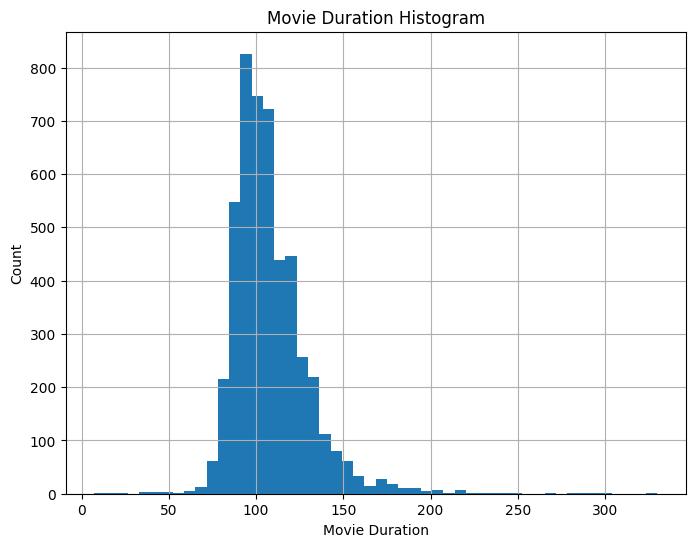

In [43]:
var = data.duration.hist(bins=50, figsize=(8,6))
var.set_xlabel('Movie Duration')
var.set_ylabel('Count')
var.set_title('Movie Duration Histogram')

Exercise: Create a hitogram to see the distribution of `imdb_score` column

Text(0.5, 1.0, 'IMDB Score Histogram')

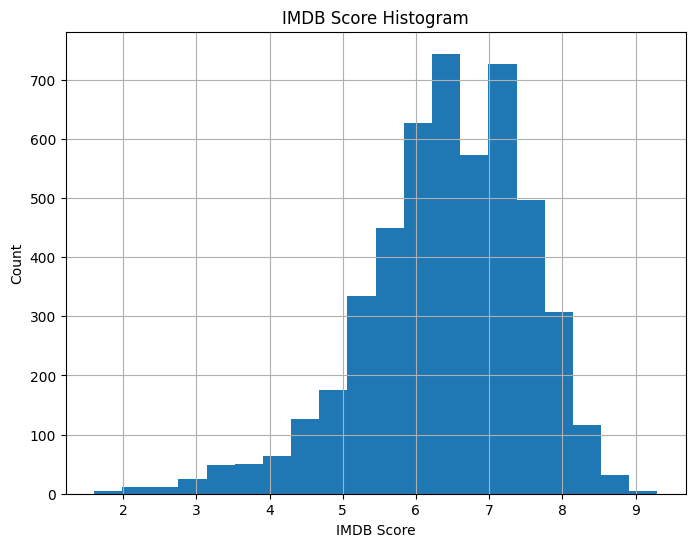

In [44]:
var = data.imdb_score.hist(bins=20, figsize=(8,6))
var.set_xlabel('IMDB Score')
var.set_ylabel('Count')
var.set_title('IMDB Score Histogram')

Let's check how many movies have the `imdb_score` less than `4`.

In [45]:
data.imdb_score < 4
low_score_movies = data[data.imdb_score < 4]
low_score_movies

,color,director_name,duration,movie_income,star_name,movie_title,language,country,movie_budget,title_year,imdb_score
217,Color,Joel Schumacher,125.0,107285004.0,Michael Gough,Batman & Robin,English,USA,125000000.0,1997,3.7
267,Color,Jan de Bont,121.0,48068396.0,Jason Patric,Speed 2: Cruise Control,English,USA,160000000.0,1997,3.7
273,Color,Bo Welch,82.0,100446895.0,Sean Hayes,The Cat in the Hat,English,USA,109000000.0,2003,3.8
313,Color,Pitof,87.0,40198710.0,Frances Conroy,Catwoman,English,USA,100000000.0,2004,3.3
319,Color,Lawrence Guterman,94.0,17010646.0,Jamie Kennedy,Son of the Mask,English,USA,84000000.0,2005,2.2
...,...,...,...,...,...,...,...,...,...,...,...
4988,Color,Terron R. Parsons,93.0,NaN,Richard Tyson,Hayride,English,USA,60000.0,2012,3.4
5000,Color,Travis Legge,83.0,NaN,Elissa Dowling,Raymond Did It,English,USA,40000.0,2011,3.2
5002,Color,Collin Joseph Neal,75.0,NaN,Julianne Gabert,"Run, Hide, Die",English,USA,50000.0,2012,3.7
5017,Color,Travis Legge,90.0,NaN,Kristen Seavey,Dry Spell,English,USA,22000.0,2013,3.3


In [46]:
low_score_movies.shape

(153, 11)

Exercise: Use a histogram to visualize the distribution of movie IMdb score in that are produced in `USA`.

<Axes: >

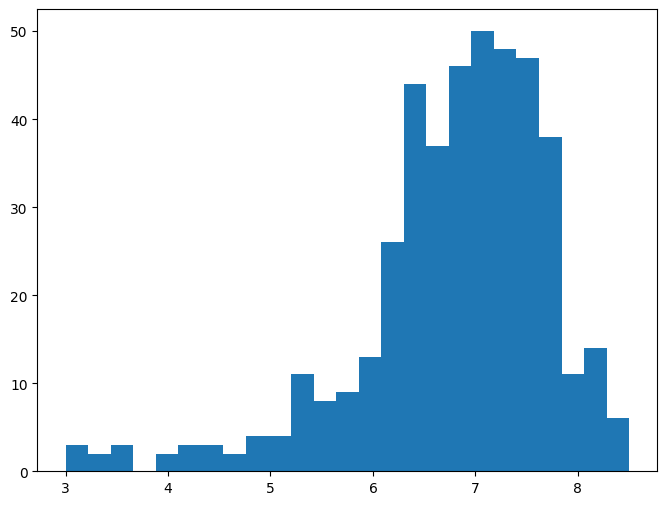

In [47]:
country_specified = data[data.country=='UK']
country_specified.imdb_score.hist(bins=25, figsize=(8,6), grid=False)

---
### Let's answer to some analytical questions 
    
Question 1 - In which year we have the `highest` and `lowest` number of movies?

Now finding out number of movies per year

In [48]:
movies_per_year = data.groupby('title_year').size()

max_movies = movies_per_year.max()
year_max_movies = movies_per_year.idxmax()

min_movies = movies_per_year.min()
year_min_movies = movies_per_year.idxmin()

print(f'Movies per year:: {movies_per_year}')
print('-------------------------------------')
print(f'Max Movies:: {max_movies} in Year:: {year_max_movies}')
print(f'Min Movies:: {min_movies} in Year:: {year_min_movies}')

Movies per year:: title_year
1916      1
1920      1
1925      1
1927      1
1929      2
       ... 
2012    221
2013    237
2014    252
2015    226
2016    106
Length: 91, dtype: int64
-------------------------------------
Max Movies:: 260 in Year:: 2009
Min Movies:: 1 in Year:: 1916


Let's create a line chart to show the result

Text(0.5, 1.0, 'Number Of Movies Produced By Year')

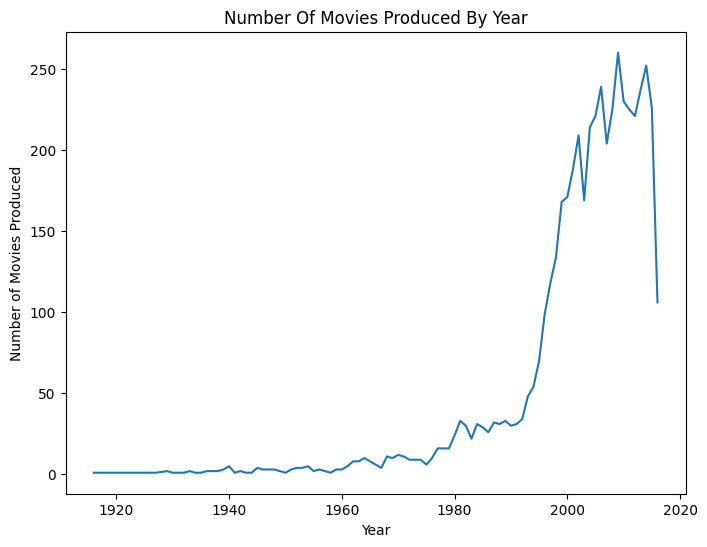

In [49]:
var = movies_per_year.plot(figsize=(8,6))
var.set_xlabel('Year')
var.set_ylabel('Number of Movies Produced')
var.set_title('Number Of Movies Produced By Year')

Question 2 - In which year we have `minimum` and `maximum` average `imdb_score` ? 

Finding average imdb score per year 

In [50]:
avg = data.groupby('title_year')['imdb_score'].mean()
max = data.groupby('title_year')['imdb_score'].mean().max()
yr_max = data.groupby('title_year')['imdb_score'].mean().idxmax()
min = data.groupby('title_year')['imdb_score'].mean().min()
yr_min = data.groupby('title_year')['imdb_score'].mean().idxmin()

print(f'Average IMDB Score By Year:: {avg}')
print('--------------------------------------')
print(f'Max IMDB Score:: {max} in Year:: {yr_max}')
print(f'MIn IMDB Score:: {min} in Year:: {yr_min}')

Average IMDB Score By Year:: title_year
1916    8.000000
1920    4.800000
1925    8.300000
1927    8.300000
1929    7.150000
          ...   
2012    6.266516
2013    6.369620
2014    6.228175
2015    6.033628
2016    6.399057
Name: imdb_score, Length: 91, dtype: float64
--------------------------------------
Max IMDB Score:: 8.55 in Year:: 1957
MIn IMDB Score:: 4.8 in Year:: 1920


Let's Use a barchart to visualize the result

Text(0.5, 1.0, 'Average IMDB Score by Year')

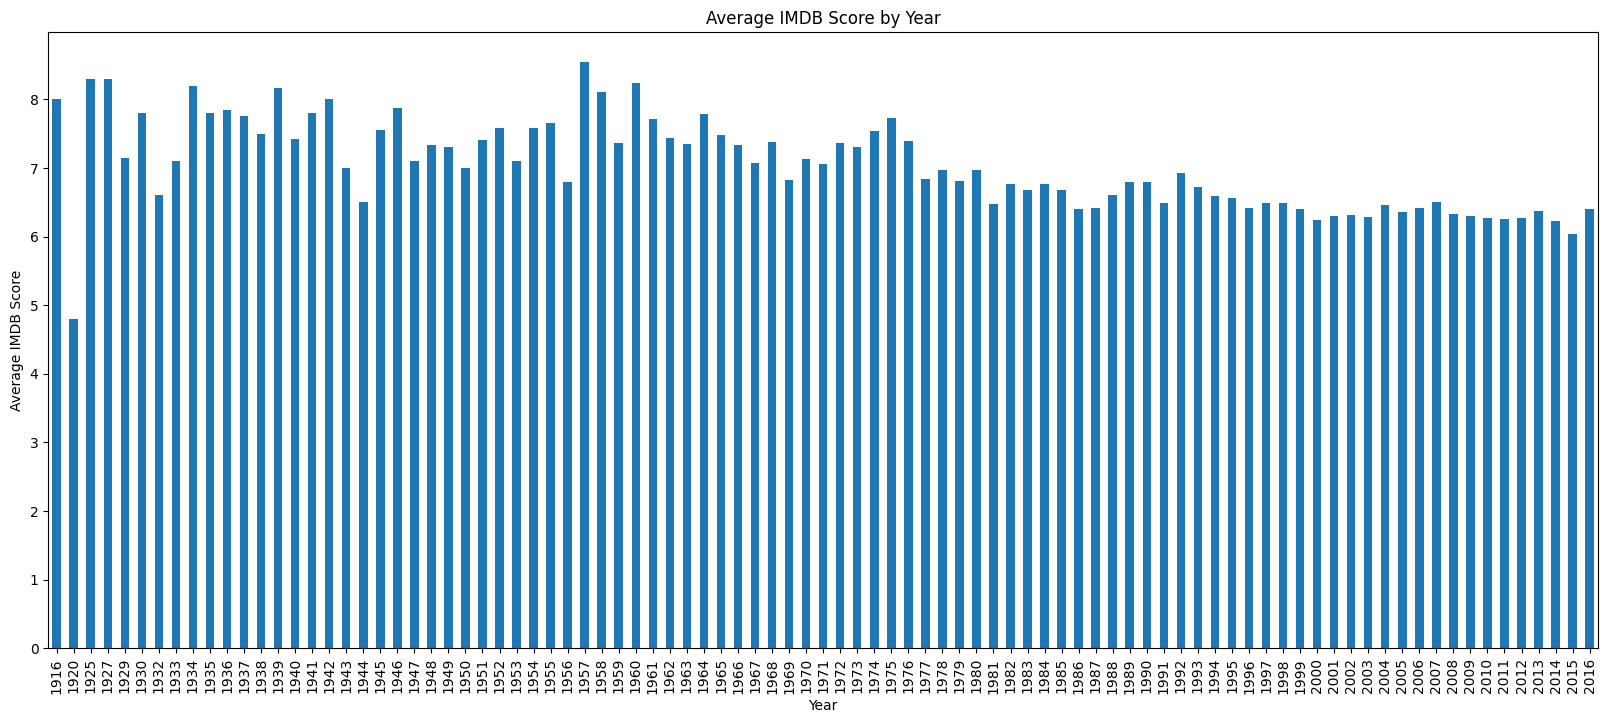

In [51]:
var = avg.plot.bar(figsize=(20,8))
var.set_xlabel('Year')
var.set_ylabel('Average IMDB Score')
var.set_title('Average IMDB Score by Year')

Exercise: 
Question 3 - In which year we have the `minimum` and `maximum` spent movie budget?

`hint: use a line chart to visualize your results.` 

Budget per Year:: title_year
1916    3.859070e+05
1920    1.000000e+05
1925    2.450000e+05
1927    6.000000e+06
1929    3.790000e+05
            ...     
2012    8.146368e+09
2013    8.631557e+09
2014    8.089608e+09
2015    7.889754e+09
2016    5.267775e+09
Name: movie_budget, Length: 91, dtype: float64
-----------------------------------
Max Budget:: 20019582000.0 in Year:: 2006
Min Budget:: 100000.0 in Year:: 1920


<Axes: xlabel='title_year'>

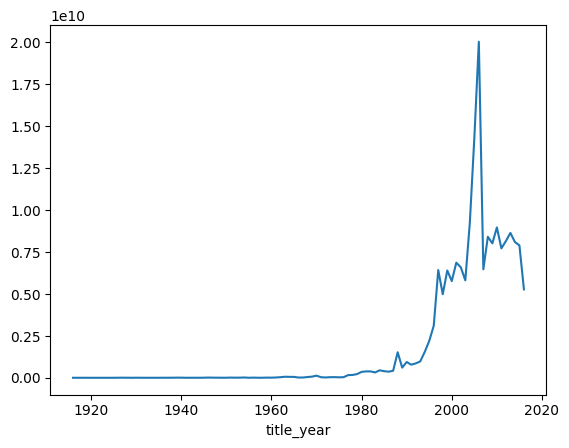

In [52]:
# Group by 'title_year' and calculate max and min budgets
grouped_budget = data.groupby('title_year')['movie_budget'].sum()
overall_max_budget = grouped_budget.max()
yr_overall_max_budget = grouped_budget.idxmax()
overall_min_budget = grouped_budget.min()
yr_overall_min_budget = grouped_budget.idxmin()

print(f'Budget per Year:: {grouped_budget}')
print('-----------------------------------')
print(f'Max Budget:: {overall_max_budget} in Year:: {yr_overall_max_budget}')
print(f'Min Budget:: {overall_min_budget} in Year:: {yr_overall_min_budget}')
grouped_budget.plot()

Budget per Year:: title_year
1916    3.859070e+05
1920    1.000000e+05
1925    2.450000e+05
1927    6.000000e+06
1929    3.790000e+05
            ...     
2012    8.146368e+09
2013    8.631557e+09
2014    8.089608e+09
2015    7.889754e+09
2016    5.267775e+09
Name: movie_budget, Length: 91, dtype: float64
-----------------------------------
Max Budget:: 20019582000.0 in Year:: 2006
Min Budget:: 100000.0 in Year:: 1920


<Axes: xlabel='title_year'>

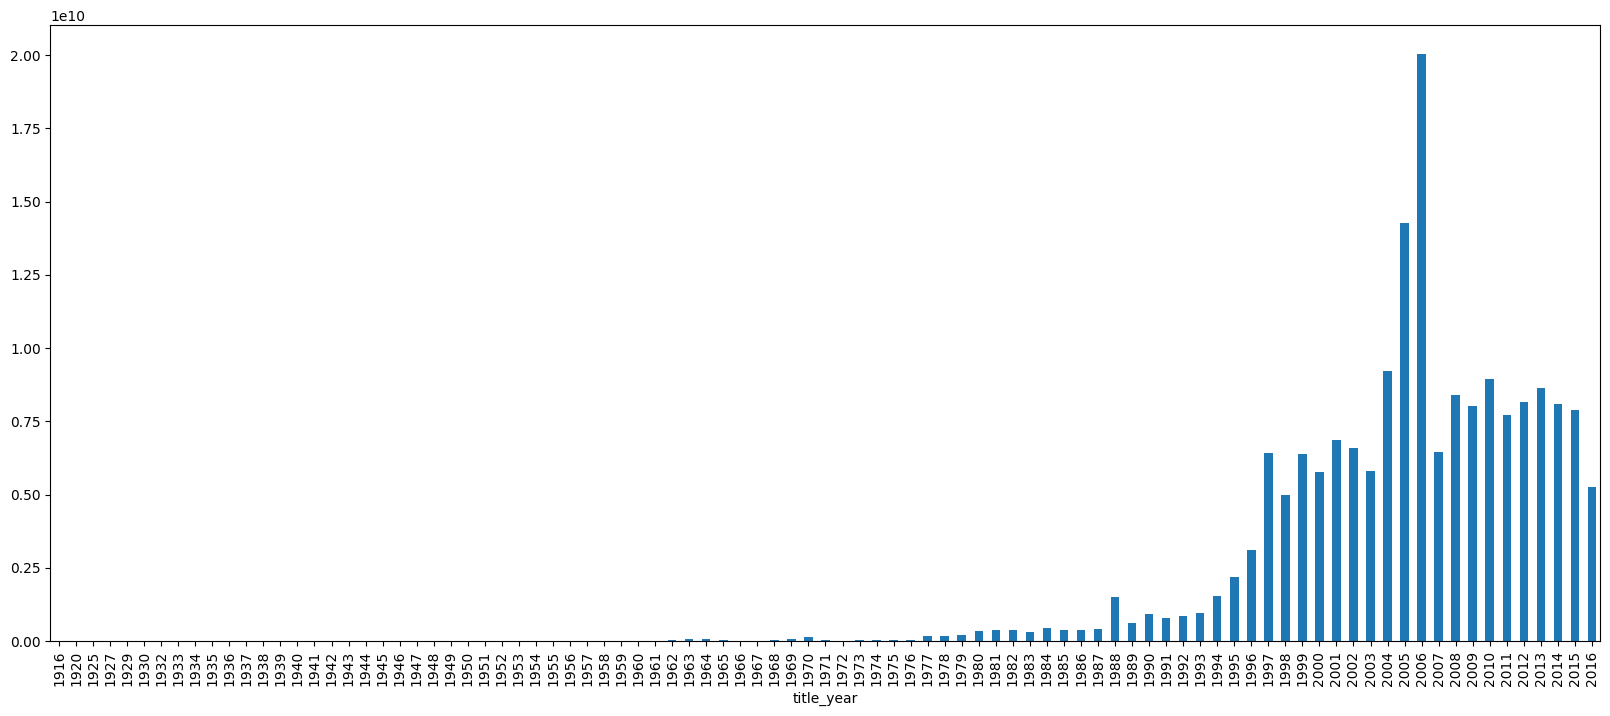

In [53]:
# Group by 'title_year' and calculate max and min budgets
grouped_budget = data.groupby('title_year')['movie_budget'].sum()
overall_max_budget = grouped_budget.max()
yr_overall_max_budget = grouped_budget.idxmax()
overall_min_budget = grouped_budget.min()
yr_overall_min_budget = grouped_budget.idxmin()

print(f'Budget per Year:: {grouped_budget}')
print('-----------------------------------')
print(f'Max Budget:: {overall_max_budget} in Year:: {yr_overall_max_budget}')
print(f'Min Budget:: {overall_min_budget} in Year:: {yr_overall_min_budget}')

grouped_budget.plot.bar(figsize=(20,8))

Question 4 - Is there any relationship between IMdb score of a movie and the movie income?

To approaches to solve this question:
- Visual Correlation Analysis 
- Generating the Correlation Matirx

In [55]:
df = data[['imdb_score', 'movie_income']]
df

,imdb_score,movie_income
0,7.9,760505847.0
1,7.1,309404152.0
2,6.8,200074175.0
3,8.5,448130642.0
5,6.6,73058679.0
...,...,...
5037,6.4,4584.0
5038,7.7,NaN
5040,6.3,NaN
5041,6.3,10443.0


Let's drop the rows with `non` values

In [58]:
df.dropna(inplace=True)
df

C:\Users\Sean\AppData\Local\Temp\ipykernel_17780\955798070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,imdb_score,movie_income
0,7.9,760505847.0
1,7.1,309404152.0
2,6.8,200074175.0
3,8.5,448130642.0
5,6.6,73058679.0
...,...,...
5034,6.3,70071.0
5035,6.9,2040920.0
5037,6.4,4584.0
5041,6.3,10443.0


Let's create a scatter plot to see the data

<Axes: xlabel='movie_income', ylabel='imdb_score'>

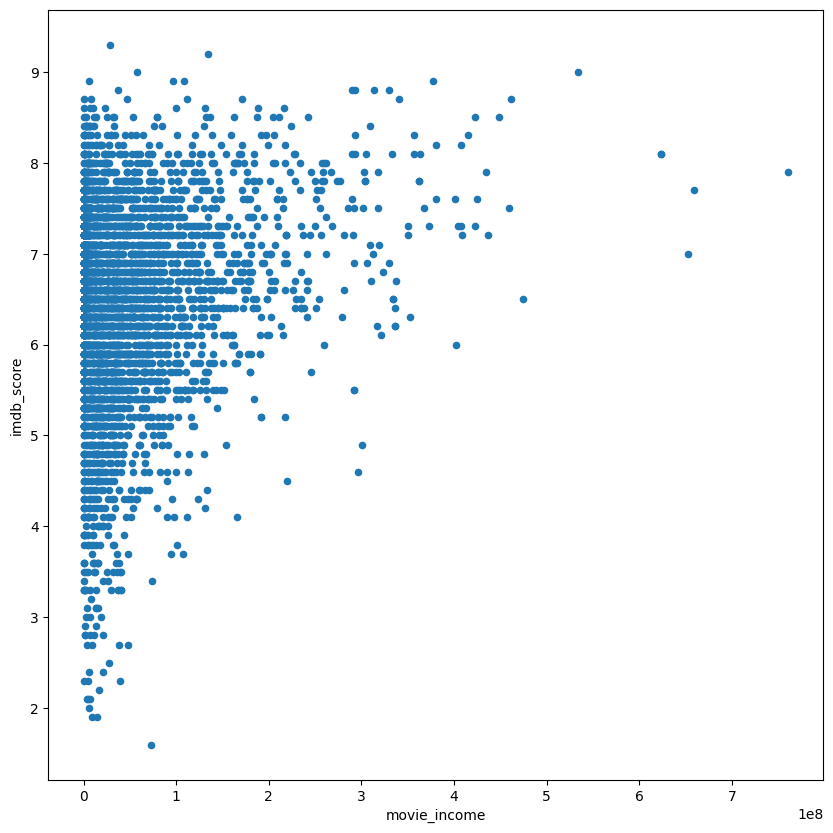

In [60]:
df.plot.scatter(x='movie_income', y='imdb_score', figsize=(10,10))

Let's generate the correlation matrix

In [61]:
df.corr()

,imdb_score,movie_income
imdb_score,1.000000,0.199432
movie_income,0.199432,1.000000
